<a href="https://colab.research.google.com/github/peisuke/ml-works/blob/main/5/5_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5.3 AdaBoostを使った分類の実験
- 内容
    - 乳がんのデータを対象にAdaBoostを用いて分類を行う
- 参考
    - 本コードは以下のサイトを参考にしました
    - https://tech-diary.net/adaboost/

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# データのダウンロード
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target

# 数値や特徴量の確認
display(X.head())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# 学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# AdaBoostの学習
base_model = DecisionTreeClassifier(max_depth=3)
adaboost = AdaBoostClassifier(base_estimator=base_model, n_estimators=50)

adaboost.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3))

In [4]:
# テストデータに対する精度の確認
pred = adaboost.predict(X_test)
result = classification_report(y_test, pred, output_dict=True, target_names=cancer.target_names)
df = pd.DataFrame(result).transpose()

In [5]:
# 精度の計算
print((y_test == pred).sum() / len(y_test))

0.9649122807017544


In [6]:
# より詳細な精度の確認（表の意味は、https://gotutiyan.hatenablog.com/entry/2020/09/09/111840、などを参照
display(df[:2])
display(df[2:])

,precision,recall,f1-score,support
malignant,0.955556,0.955556,0.955556,45.0
benign,0.971014,0.971014,0.971014,69.0


,precision,recall,f1-score,support
accuracy,0.964912,0.964912,0.964912,0.964912
macro avg,0.963285,0.963285,0.963285,114.000000
weighted avg,0.964912,0.964912,0.964912,114.000000


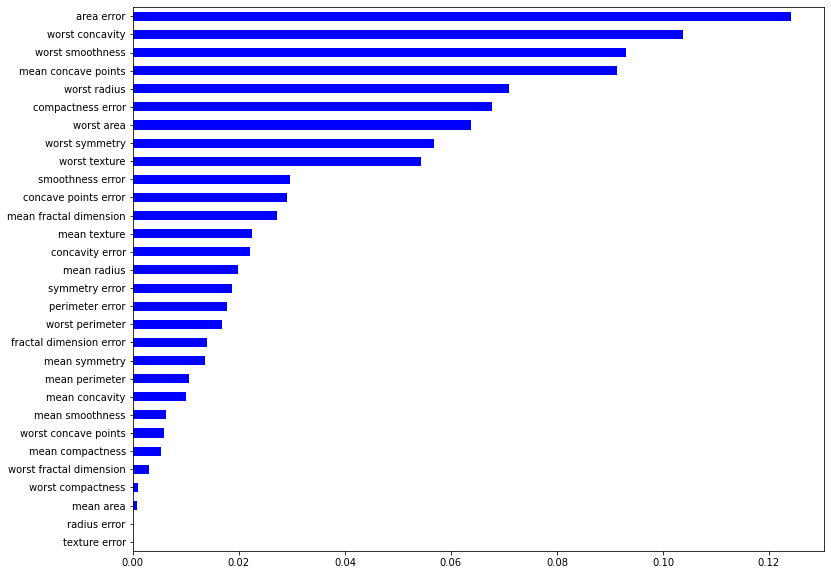

In [7]:
# 特徴量の重要度の可視化
s = pd.Series(adaboost.feature_importances_, index=cancer.feature_names)
s = s.sort_values(ascending=True)

plt.figure(figsize=(16, 10))
s.plot.barh(color="b")
plt.subplots_adjust(left=0.3)
plt.show()